In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## saco de los subject los kinetoplastidos 

In [83]:
df = pd.read_csv('../../../../results/reciprocal_best_hit_TSV/rbh_all_in_one_file.tsv', sep='\t', index_col=0)
print( df.query_uniprot_accession.nunique() )
print( df.spp.nunique() )

#only kineto df
df_kineto = df.loc[df['spp'].isin(['TRYCC','TRYB2','LEIIN']),:]
print( df_kineto.query_uniprot_accession.nunique() )

#removing tryp organisms
df = df.loc[~df['spp'].isin(['TRYCC','TRYB2','LEIIN']),:]

#removing duplicates because in the subject db there are proteins with two files a pdb and cif
df = df.drop_duplicates(subset = ['query_uniprot_accession', 'target_uniprot_accession'])

23557
48
11371


In [130]:

#dataframe with GO annotation informattion
df_gene_information1 = pd.read_csv('../../../../config/mandatory_files/Ortholog_group_to_geneID.tsv',
                                  sep='\t',
                                  names=['Ortholog Group', 'geneID'])

df_gene_information2 = pd.read_csv('../../../../config/mandatory_files/fasta_header_to_uniprot.tsv',
                                  sep='\t',
                                  names=['geneID', 'uniprot'])

In [131]:
df_gene_information = df_gene_information2.merge(df_gene_information1)

In [137]:
df_gene_information.groupby('uniprot')['Ortholog Group'].size().sort_values().tail(20)

uniprot
A0A2V2V8N5     48
Q57WZ9         48
A0A2V2VE03     49
Q581G5         50
Q584A6         50
Q9U701         57
Q584A5         69
Q57TQ9         69
Q4GY71         69
Q580P3         70
Q4GZ15         70
Q581G2         70
Q4GY91         70
Q582W4         70
Q581F5         71
Q57YD5         83
Q57YD6         83
A0A2V2UI35    116
A0A2V2WKF8    127
A0A2V2UPG1    137
Name: Ortholog Group, dtype: int64

In [125]:
df_gene_information = df_gene_information.drop_duplicates(subset=['uniprot','Ortholog Group'])

# contra que dan hit las proteinas en el rbh considerando solo kinetoplastidos

In [126]:
df_kineto1 = df_kineto.merge(df_gene_information, left_on='query_uniprot_accession', right_on='uniprot', how='left')
print( df_kineto1.query_uniprot_accession.nunique() )
df_kineto2 = df_kineto1.merge(df_gene_information, left_on='target_uniprot_accession', right_on='uniprot', suffixes=['_query', '_target'], how='left')
print( df_kineto2.query_uniprot_accession.nunique() )

11371
11371


In [127]:
#best hit for every structure

df_kineto_one_hit_by_structure = df_kineto2.sort_values('evalue').drop_duplicates(subset=['query_uniprot_accession'], keep='first')

#cuantas estructuras su mejor hit son ellas mismas?

boolean_same_uniprot = df_kineto_one_hit_by_structure['query_uniprot_accession'] == df_kineto_one_hit_by_structure['target_uniprot_accession']

print('Amount of rbh with hit')
print(df_kineto2.query_uniprot_accession.nunique())
print('Amount of rbh with its best hit been the same structure')
print(boolean_same_uniprot.value_counts())

Amount of rbh with hit
11371
Amount of rbh with its best hit been the same structure
False    6233
True     5138
dtype: int64


### Cuanto dan el mismo grupo de orthologos?

In [128]:
df_kineto_one_hit_by_structure.loc[:,'same_OG_qt'] = df_kineto_one_hit_by_structure['Ortholog Group_query'] == df_kineto_one_hit_by_structure['Ortholog Group_target']

df_kineto_one_hit_by_structure.same_OG_qt.value_counts()

True     9322
False    2049
Name: same_OG_qt, dtype: int64

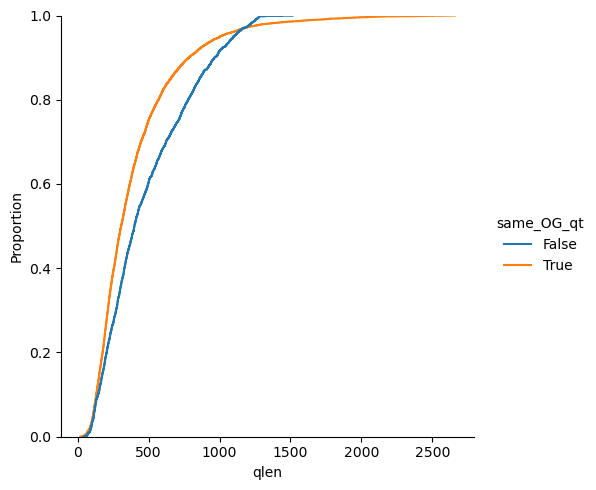

In [129]:
#sns.displot(data=df_kineto_one_hit_by_structure, x='qlen', hue='same_OG_qt')
sns.displot(data=df_kineto_one_hit_by_structure, x='qlen', hue='same_OG_qt', kind='ecdf')

# Organismos no kinetoplastidos 

In [122]:
df.merge(df_gene_information, left_on='query_uniprot_accession', right_on='uniprot', how='left')

,query,target,alnlen,fident,evalue,qstart,qend,qlen,tstart,tend,...,aligmentinfo,proteome,spp,query_uniprot_accession,target_uniprot_accession,COV_query,COV_target,geneID,uniprot,Ortholog Group
0,AF-A0A7G2CFL2-F1-model_v4.pdb,AF-X8F7W8-F1-model_v4.cif.gz,32,0.124,8.705000e-02,223,334,338,8,114,...,4M9I10M7I16M1I2M4I2M1I15M11D8M3D19M1D6M2D8M,UP000020681,MYCUL,A0A7G2CFL2,X8F7W8,0.33,0.91,ADEAN_000562100,A0A7G2CFL2,OG6r16_220411
1,AF-V5AJJ7-F1-model_v4.pdb,AF-X8FNY1-F1-model_v4.pdb.gz,55,0.120,3.113000e-03,2,149,168,0,136,...,48M10I8M3I13M1D30M1D36M,UP000020681,MYCUL,V5AJJ7,X8FNY1,0.88,0.99,TCDM_11635,V5AJJ7,OG6r16_517451
2,AF-A0A0N0DRD1-F1-model_v4.pdb,AF-X8FHS3-F1-model_v4.cif.gz,39,0.250,1.137000e+00,126,169,404,5,48,...,44M,UP000020681,MYCUL,A0A0N0DRD1,X8FHS3,0.11,0.88,LpyrH10_30_0650,A0A0N0DRD1,OG6_126919
3,AF-A0A0N0DRD1-F1-model_v4.pdb,AF-X8EZS2-F1-model_v4.pdb.gz,39,0.154,8.348000e-03,107,359,404,2,307,...,42M1D10M16D17M37D7M1D8M8I14M5D12M2D11M1D43M6I1...,UP000020681,MYCUL,A0A0N0DRD1,X8EZS2,0.62,0.99,LpyrH10_30_0650,A0A0N0DRD1,OG6_126919
4,AF-A0A061J8G7-F1-model_v4.pdb,AF-X8FDF3-F1-model_v4.pdb.gz,126,0.200,1.400000e-02,61,130,194,1,67,...,55M3I12M,UP000020681,MYCUL,A0A061J8G7,X8FDF3,0.36,0.94,TRSC58_01846,A0A061J8G7,OG6_144747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286014,AF-Q4QGU6-F1-model_v4.pdb,AF-Q54RB5-F1-model_v4.pdb.gz,326,0.127,9.933000e-13,0,339,436,0,252,...,37M3I5M10I5M28I9M2D36M1I48M5I2M4D43M7I12M8I17M...,UP000002195,DICDI,Q4QGU6,Q54RB5,0.78,0.98,LMJLV39_110021000,Q4QGU6,OG6_136309
286015,AF-Q4QGU6-F1-model_v4.pdb,AF-Q54RB5-F1-model_v4.pdb.gz,326,0.127,9.933000e-13,0,339,436,0,252,...,37M3I5M10I5M28I9M2D36M1I48M5I2M4D43M7I12M8I17M...,UP000002195,DICDI,Q4QGU6,Q54RB5,0.78,0.98,LMJSD75_110021500,Q4QGU6,OG6_136309
286016,AF-Q4QGU6-F1-model_v4.pdb,AF-Q54RB5-F1-model_v4.pdb.gz,326,0.127,9.933000e-13,0,339,436,0,252,...,37M3I5M10I5M28I9M2D36M1I48M5I2M4D43M7I12M8I17M...,UP000002195,DICDI,Q4QGU6,Q54RB5,0.78,0.98,LmjF.11.1360,Q4QGU6,OG6_136309
286017,AF-Q4QGU6-F1-model_v4.pdb,AF-Q54RB5-F1-model_v4.pdb.gz,326,0.127,9.933000e-13,0,339,436,0,252,...,37M3I5M10I5M28I9M2D36M1I48M5I2M4D43M7I12M8I17M...,UP000002195,DICDI,Q4QGU6,Q54RB5,0.78,0.98,LmjF.11.1360,Q4QGU6,OG6_136309


In [80]:
df.query_uniprot_accession.nunique()

20395

In [121]:
df.shape

(118739, 18)